<a href="https://colab.research.google.com/github/tina287/fianceHomework/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
!pip install yfinance

In [257]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

# 抓取股票資料

In [258]:

stock_id = "TSM"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=120)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# download參數1: 股票代號(在Yahoo! Finance的搜索找到每隻股票的代號), 參數2: 開始時間, 參數3: 結束時間
# pandas.dataFrame.reset_index()重製舊索引，將舊索引添加為列
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-06-04,153.399994,153.789993,150.990005,152.470001,151.431580,10066700
1,2024-06-05,158.589996,163.729996,157.949997,162.919998,161.810410,23192600
2,2024-06-06,164.520004,164.699997,160.360001,162.070007,160.966202,14819100
3,2024-06-07,163.570007,166.119995,161.960007,164.389999,163.270401,14023300
4,2024-06-10,164.000000,169.839996,162.419998,168.160004,167.014725,12438400
...,...,...,...,...,...,...,...
78,2024-09-25,181.520004,183.820007,181.210007,182.350006,182.350006,8280900
79,2024-09-26,188.500000,189.330002,183.800003,186.830002,186.830002,15103400
80,2024-09-27,185.839996,185.940002,177.399994,177.970001,177.970001,17908400
81,2024-09-30,174.270004,176.820007,171.929993,173.669998,173.669998,13540200


# 1.技術指標






## SMA

In [259]:
# 1. `df['Close']`: 這是從DataFrame `df` 中選取 'Close' 列,也就是收盤價。
# 2. `.rolling(window=8)`: rolling()函數，括號內代表要滾動幾個資料點的參數，`window=8` 意味著這個窗口的大小是8個交易日。
# 3. `.mean()`: 這個方法計算滾動窗口內的平均值。
# 4. `df['8_SMA'] = ...`: 這將計算結果賦值給DataFrame中的一個新列,名為 '8_SMA'。

# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA
63,2024-09-04,159.300003,163.880005,158.949997,160.869995,160.278412,11317400,167.788750,169.401537,168.641499
64,2024-09-05,161.539993,164.589996,161.050003,163.699997,163.098007,10260600,166.841249,168.567692,169.074500
65,2024-09-06,164.889999,165.410004,156.009995,156.820007,156.243317,14964400,165.309999,167.134615,168.688000
66,2024-09-09,160.759995,163.100006,160.250000,162.779999,162.181396,10339000,164.338749,166.422308,168.471000
67,2024-09-10,162.889999,162.889999,157.690002,162.429993,161.832672,11910800,163.492498,165.729230,168.210999
68,2024-09-11,163.800003,170.380005,161.419998,170.229996,169.604004,15059500,163.627499,166.020768,168.105499
69,2024-09-12,170.600006,172.149994,169.000000,171.429993,171.429993,13415500,163.593748,166.032306,168.178499
70,2024-09-13,172.240005,174.770004,171.449997,172.500000,172.500000,8787800,165.094997,166.296152,168.105499
71,2024-09-16,169.910004,170.559998,166.770004,169.080002,169.080002,12194300,166.121248,166.183075,167.832499
72,2024-09-17,169.350006,170.240005,166.360001,167.350006,167.350006,8629100,166.577499,166.040768,167.427499


## RSI

In [260]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
# df['Close'].shift(1): shift(1) 函數將整個 'Close' 列向下移動一行。如果不使用 shift()，每一行都會與自己相減，結果全為0。shift(1) 意味著將數據向下移動1行，所以每一行現在對應的是前一天的收盤價。
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0

df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss
73,2024-09-18,168.460007,171.600006,167.000000,167.279999,167.279999,9116000,167.884998,165.896922,167.189500,-0.070007,0.000000,0.070007
74,2024-09-19,174.380005,177.779999,172.630005,176.220001,176.220001,15855000,169.564999,166.244615,167.428500,8.940002,8.940002,0.000000
75,2024-09-20,174.869995,176.020004,173.649994,174.080002,174.080002,18429800,171.021250,167.289999,167.810500,-2.139999,0.000000,2.139999
76,2024-09-23,174.839996,175.399994,173.699997,174.759995,174.759995,5794200,171.587500,168.358461,167.984499,0.679993,0.679993,0.000000
77,2024-09-24,179.500000,182.779999,177.050003,181.970001,181.970001,14576100,172.905001,169.763846,168.629499,7.210007,7.210007,0.000000
78,2024-09-25,181.520004,183.820007,181.210007,182.350006,182.350006,8280900,174.136251,171.727692,169.219499,0.380005,0.380005,0.000000
79,2024-09-26,188.500000,189.330002,183.800003,186.830002,186.830002,15103400,176.355001,173.577692,170.100999,4.479996,4.479996,0.000000
80,2024-09-27,185.839996,185.940002,177.399994,177.970001,177.970001,17908400,177.682501,174.773077,170.542000,-8.860001,0.000000,8.860001
81,2024-09-30,174.270004,176.820007,171.929993,173.669998,173.669998,13540200,178.481251,175.037693,170.640500,-4.300003,0.000000,4.300003
82,2024-10-01,175.309998,175.990005,170.779999,172.070007,172.070007,11832500,177.962502,175.086925,171.219500,-1.599991,0.000000,1.599991


In [261]:
# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
78,2024-09-25,181.520004,183.820007,181.210007,182.350006,182.350006,8280900,174.136251,171.727692,169.219499,0.380005,0.380005,0.000000,2.374286,1.042143,2.278274,69.496141
79,2024-09-26,188.500000,189.330002,183.800003,186.830002,186.830002,15103400,176.355001,173.577692,170.100999,4.479996,4.479996,0.000000,2.694286,0.550715,4.892343,83.028824
80,2024-09-27,185.839996,185.940002,177.399994,177.970001,177.970001,17908400,177.682501,174.773077,170.542000,-8.860001,0.000000,8.860001,2.268572,1.183572,1.916717,65.714874
81,2024-09-30,174.270004,176.820007,171.929993,173.669998,173.669998,13540200,178.481251,175.037693,170.640500,-4.300003,0.000000,4.300003,2.268572,1.465715,1.547758,60.749811
82,2024-10-01,175.309998,175.990005,170.779999,172.070007,172.070007,11832500,177.962502,175.086925,171.219500,-1.599991,0.000000,1.599991,1.711429,1.580000,1.083183,51.996540


## MACD

In [262]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 顯示DataFrame的最後幾行數據
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-06-04,153.399994,153.789993,150.990005,152.470001,151.431580,10066700,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,152.470001,152.470001,0.000000
1,2024-06-05,158.589996,163.729996,157.949997,162.919998,161.810410,23192600,NaN,NaN,NaN,10.449997,10.449997,0.000000,NaN,NaN,NaN,NaN,154.792223,153.962858,0.829365
2,2024-06-06,164.520004,164.699997,160.360001,162.070007,160.966202,14819100,NaN,NaN,NaN,-0.849991,0.000000,0.849991,NaN,NaN,NaN,NaN,156.409508,155.121022,1.288486


# 2.資料可視化


## 可視化收盤價折線圖 ***

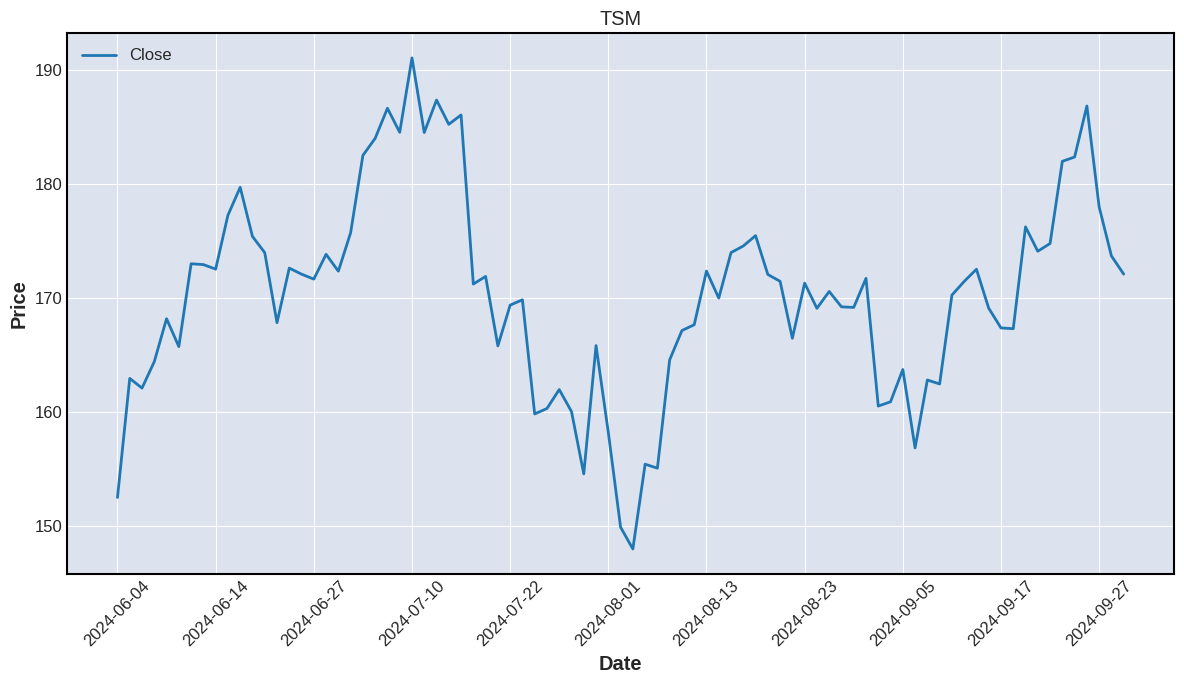

In [263]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 加入技術指標

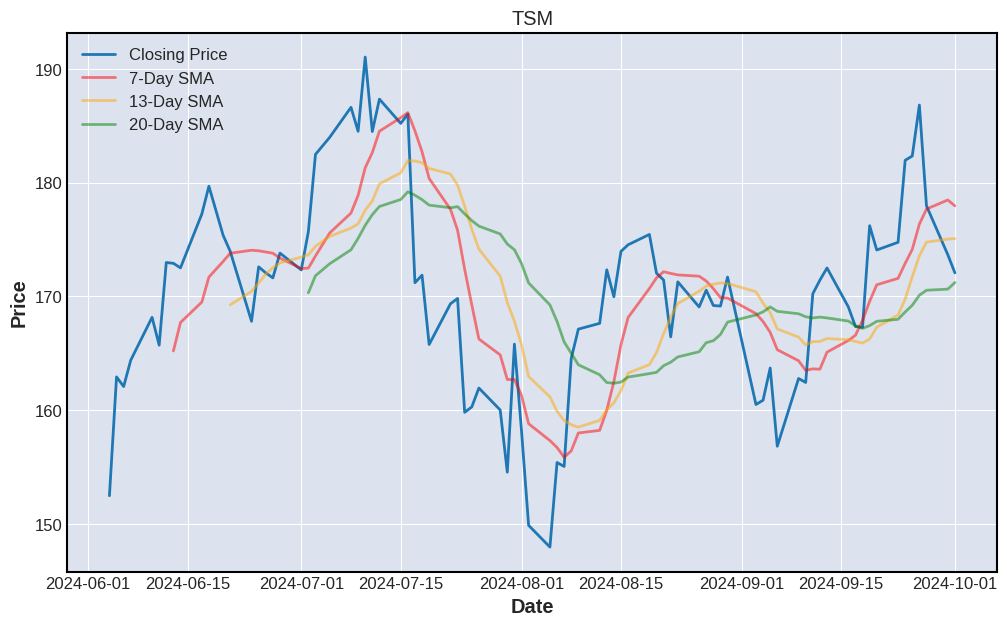

In [264]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='7-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## K線

In [265]:
!pip install mplfinance

In [266]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2024-8-01':'2024-09-18'].tail()

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,,
2024-09-12,170.600006,172.149994,169.000000,171.429993,171.429993,13415500,163.593748,166.032306,168.178499,1.199997,1.199997,0.000000,1.931427,1.574999,1.226304,55.082495,166.323939,166.270320,0.053620
2024-09-13,172.240005,174.770004,171.449997,172.500000,172.500000,8787800,165.094997,166.296152,168.105499,1.070007,1.070007,0.000000,1.662142,1.574999,1.055329,51.345986,167.696397,167.160274,0.536123
2024-09-16,169.910004,170.559998,166.770004,169.080002,169.080002,12194300,166.121248,166.183075,167.832499,-3.419998,0.000000,3.419998,1.662142,1.661428,1.000430,50.010740,168.003865,167.434521,0.569344
2024-09-17,169.350006,170.240005,166.360001,167.350006,167.350006,8629100,166.577499,166.040768,167.427499,-1.729996,0.000000,1.729996,1.556428,1.784999,0.871949,46.579737,167.858563,167.422447,0.436116
2024-09-18,168.460007,171.600006,167.000000,167.279999,167.279999,9116000,167.884998,165.896922,167.189500,-0.070007,0.000000,0.070007,1.556428,1.693571,0.919022,47.890111,167.729993,167.402097,0.327896


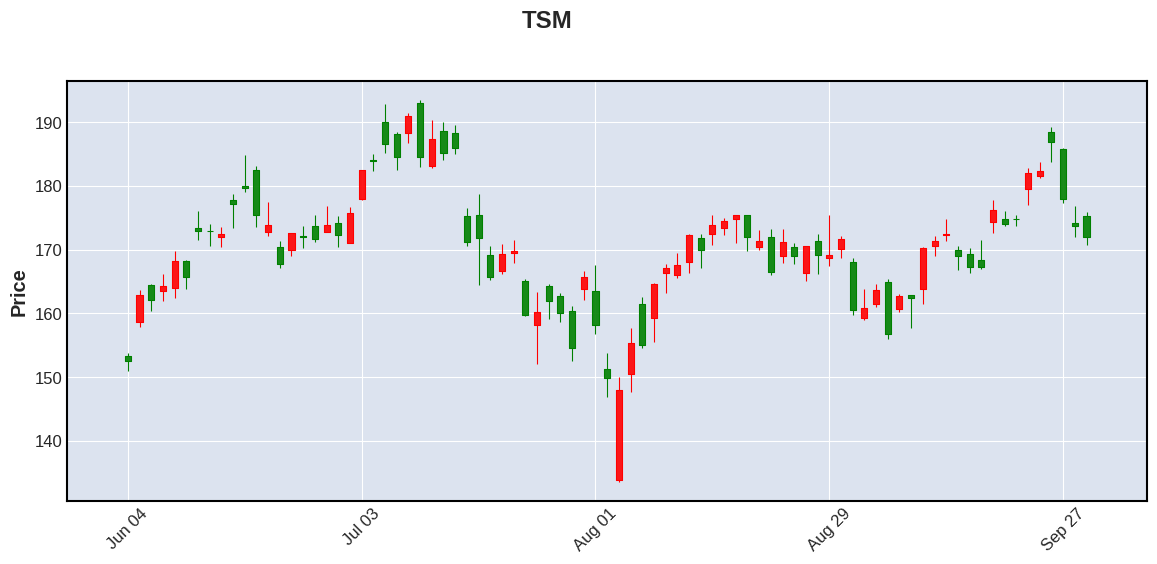

In [267]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 捕捉 Hammer 型態

In [268]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-19,174.759995,175.449997,171.100006,175.449997,174.804810,11511000,170.695000,163.99846,163.208499,0.910004,...,2.962858,1.469286,2.016529,66.849313,170.38039,168.257172,2.123218,0.690002,3.659988,0.0
2024-09-10,162.889999,162.889999,157.690002,162.429993,161.832672,11910800,163.492498,165.72923,168.210999,-0.350006,...,1.288570,1.974998,0.652441,39.483465,163.33223,164.607104,-1.274874,0.460007,4.739990,0.0


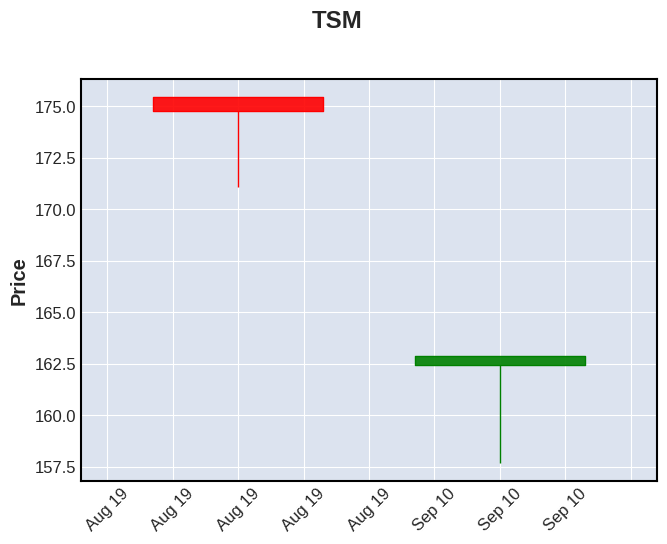

In [269]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 捕捉 Doji 型態

In [270]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-12,173.360001,176.059998,171.539993,172.979996,171.801895,20309500,NaN,NaN,NaN,7.269989,...,NaN,NaN,NaN,NaN,164.113378,161.171298,2.942080,0.380005,1.440002,2.699997
2024-06-13,172.949997,174.070007,170.509995,172.910004,172.274155,15591800,165.201252,NaN,NaN,-0.069992,...,NaN,NaN,NaN,NaN,166.068184,162.848256,3.219928,0.039993,2.400009,1.120010
2024-06-18,180.020004,184.860001,178.990005,179.690002,179.029221,27155100,171.698751,NaN,NaN,2.449997,...,NaN,NaN,NaN,NaN,171.892164,168.030535,3.861629,0.330002,0.699997,4.839996
2024-06-26,172.119995,173.690002,170.199997,172.070007,171.437241,11901500,173.907503,171.954618,NaN,-0.529999,...,1.809286,1.155714,1.565514,61.021453,172.005106,170.244136,1.760971,0.049988,1.870010,1.570007
2024-07-05,184.139999,185.080002,182.300003,183.990005,183.313400,11372900,175.577503,175.284619,172.871503,1.500000,...,1.843572,1.052144,1.752206,63.665510,177.134352,174.834167,2.300184,0.149994,1.690002,0.940002
2024-08-29,168.649994,175.419998,167.509995,169.149994,168.527969,13213200,169.896250,171.186923,166.648499,-0.050003,...,1.215714,1.070714,1.135424,53.170884,169.728296,169.290933,0.437363,0.500000,1.139999,6.270004
2024-09-10,162.889999,162.889999,157.690002,162.429993,161.832672,11910800,163.492498,165.729230,168.210999,-0.350006,...,1.288570,1.974998,0.652441,39.483465,163.332230,164.607104,-1.274874,0.460007,4.739990,0.000000
2024-09-13,172.240005,174.770004,171.449997,172.500000,172.500000,8787800,165.094997,166.296152,168.105499,1.070007,...,1.662142,1.574999,1.055329,51.345986,167.696397,167.160274,0.536123,0.259995,0.790009,2.270004
2024-09-23,174.839996,175.399994,173.699997,174.759995,174.759995,5794200,171.587500,168.358461,167.984499,0.679993,...,2.061428,1.042143,1.978067,66.421168,171.531066,170.196422,1.334644,0.080002,1.059998,0.559998


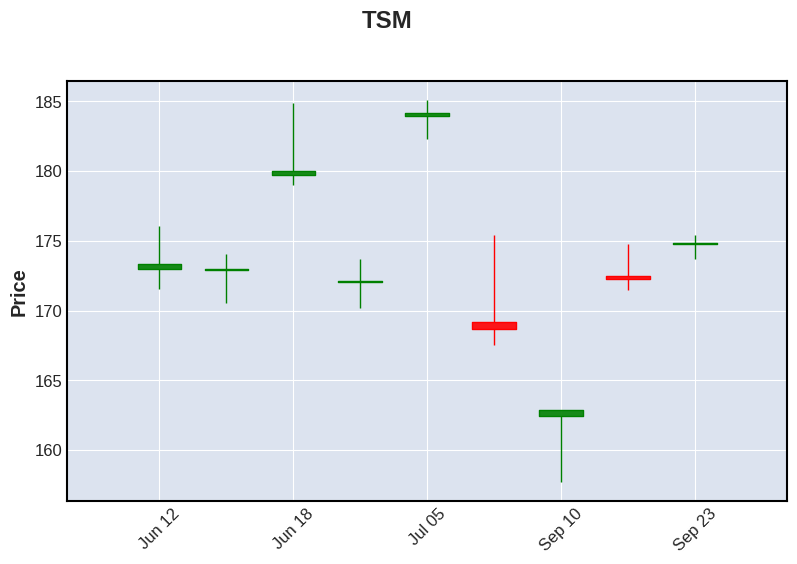

In [271]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# 3.機器學習預測股價漲跌

## 資料前處理

In [272]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [273]:
# 標籤生成: 預測未來1天的價格，這裡以2024-04-01的技術指標 預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((63, 3), (63,))

In [274]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 3), (13, 3), (50,), (13,))

## 線性回歸

In [275]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 4.76
線性回歸模型預測未來1天的價格: 176.97


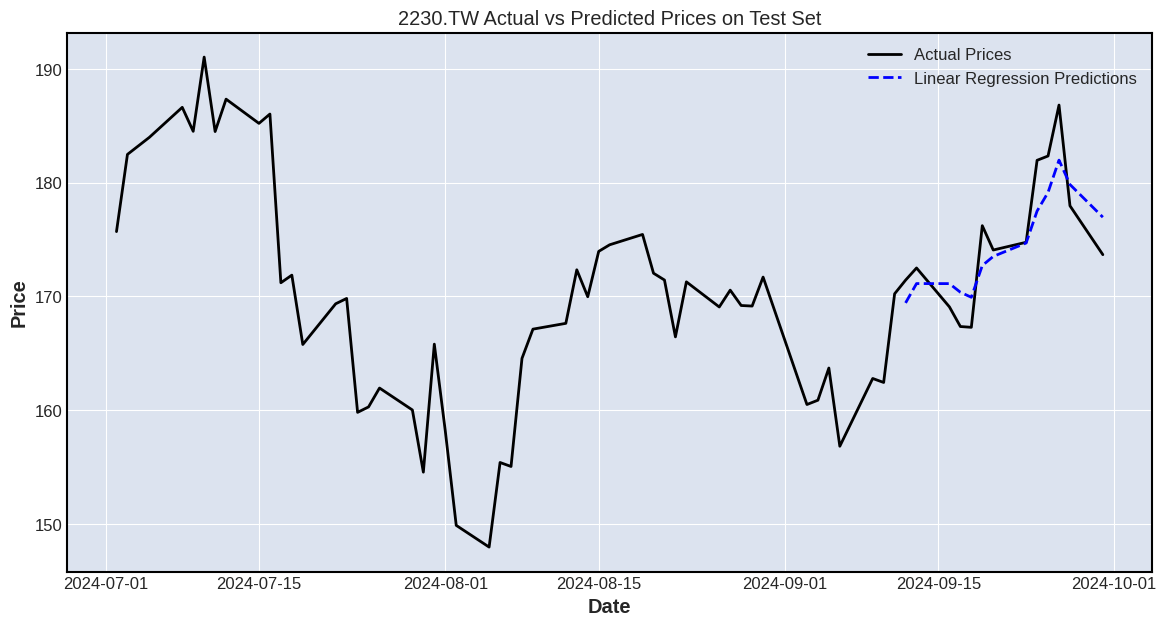

In [276]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 決策樹

In [277]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 7.09
決策樹模型預測未來1天的價格: 171.44


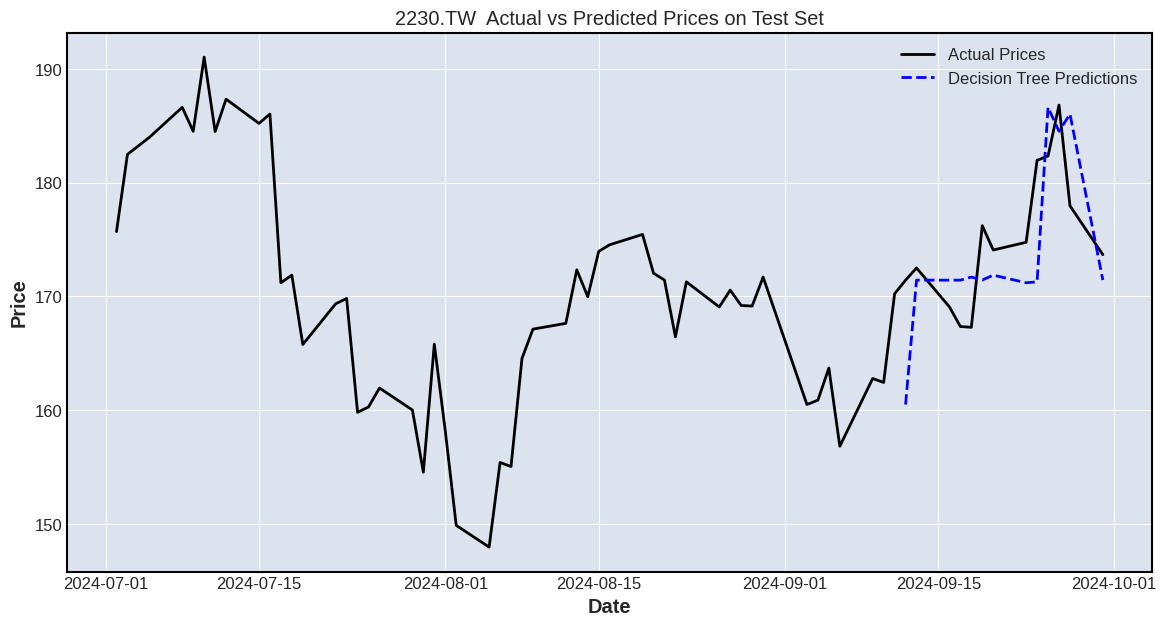

In [278]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}
tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("最佳參數:", best_params)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"調整後的決策樹模型RMSE: {rmse:.2f}")

future_pred = best_model.predict(X[-1:])
print(f"調整後的決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
最佳參數: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
調整後的決策樹模型RMSE: 6.26
調整後的決策樹模型預測未來1天的價格: 174.70


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
204 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

## 隨機森林

In [279]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 5.57
隨機森林模型預測未來1天的價格: 177.98


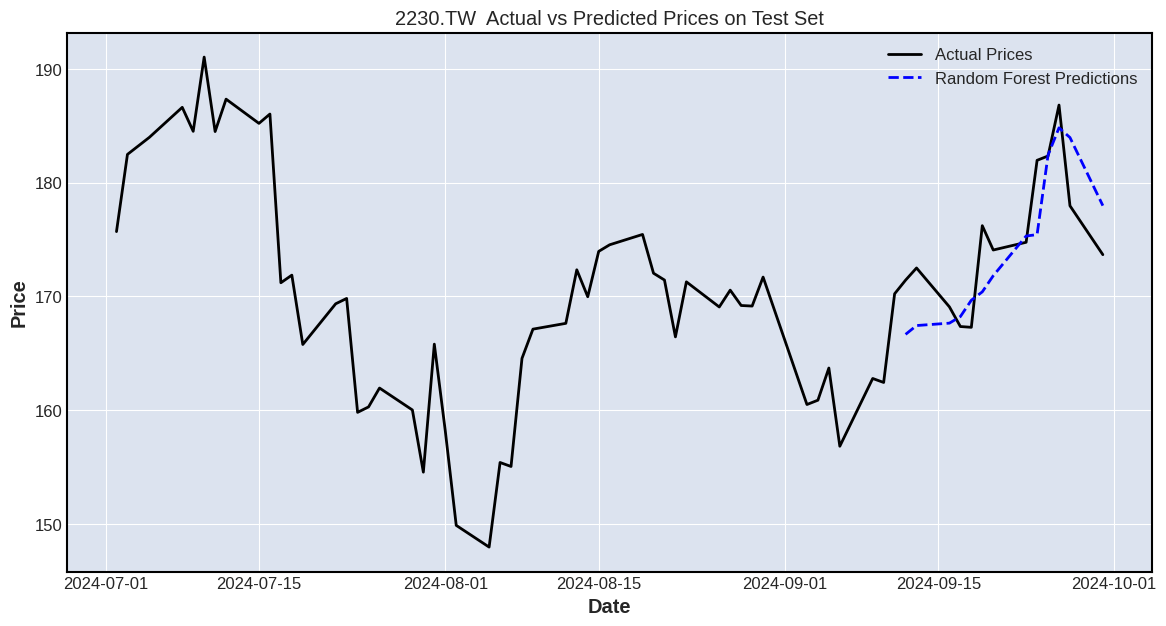

In [280]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()